In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from train_test_split import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from LLS import LinearLeastSquare

In [2]:
data = pd.read_csv("input/HousePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
data.drop_duplicates(inplace=True)

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

data["Price(USD)"] = data["Price(USD)"] * (60 / 30)

data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,123333.34
1,60,1,True,True,True,Shahran,1.850000e+09,123333.34
2,79,2,True,True,True,Pardis,5.500000e+08,36666.66
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,60166.66
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,466666.66


In [15]:
data["Parking"] = data["Parking"].replace([True, False], [1, 0])
data["Warehouse"] = data["Warehouse"].replace([True, False], [1, 0])
data["Elevator"] = data["Elevator"].replace([True, False], [1, 0])
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,1,1,1,1.850000e+09,123333.34
1,60,1,1,1,1,1.850000e+09,123333.34
2,79,2,1,1,1,5.500000e+08,36666.66
3,95,2,1,1,1,9.025000e+08,60166.66
4,123,2,1,1,1,7.000000e+09,466666.66


In [5]:
sorted_data = data.sort_values(by="Price", ascending=False)
top_5_expensive_houses = sorted_data.head(5)
top_5_expensive_houses = top_5_expensive_houses[["Address", "Price"]]
top_5_expensive_houses

,Address,Price
1606,Zaferanieh,9.240000e+10
1704,Abazar,9.100000e+10
405,Lavasan,8.500000e+10
770,Ekhtiarieh,8.160000e+10
1249,Niavaran,8.050000e+10


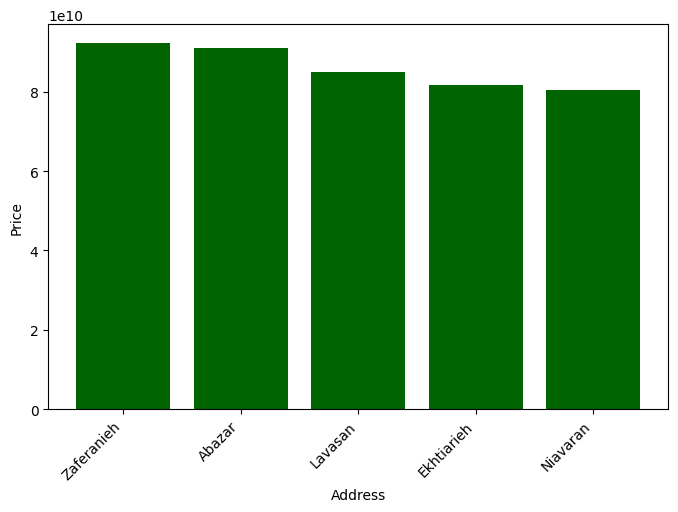

In [6]:
plt.figure(figsize=(8, 5))
plt.bar(top_5_expensive_houses["Address"],
        top_5_expensive_houses["Price"], color="darkgreen")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

In [7]:
data.drop(["Address"], inplace=True, axis=1)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,1,1,1,1.850000e+09,123333.34
1,60,1,1,1,1,1.850000e+09,123333.34
2,79,2,1,1,1,5.500000e+08,36666.66
3,95,2,1,1,1,9.025000e+08,60166.66
4,123,2,1,1,1,7.000000e+09,466666.66


In [8]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670121,0.200009,0.072364,0.047034,0.720935,0.720935
Room,0.670121,1.000000,0.278743,0.125894,0.181826,0.569738,0.569738
Parking,0.200009,0.278743,1.000000,0.429241,0.428801,0.193761,0.193761
Warehouse,0.072364,0.125894,0.429241,1.000000,0.205098,0.109370,0.109370
Elevator,0.047034,0.181826,0.428801,0.205098,1.000000,0.110310,0.110310
Price,0.720935,0.569738,0.193761,0.109370,0.110310,1.000000,1.000000
Price(USD),0.720935,0.569738,0.193761,0.109370,0.110310,1.000000,1.000000


In [9]:
X = np.array([data["Area"], data["Room"], data["Parking"]]).T
Y = np.array(data["Price"])

In [10]:
x_train, y_train, x_test, y_test = train_test_split(X, Y)

print(f"x_train shape is {x_train.shape}")
print(f"y_train shape is {y_train.shape}")
print(f"x_test shape is {x_test.shape}")
print(f"y_test shape is {y_test.shape}")

x_train shape is (2593, 3)
y_train shape is (2593,)
x_test shape is (649, 3)
y_test shape is (649,)


In [11]:
lls = LinearLeastSquare()
lls.fit(x_train, y_train)

In [12]:
mae_loss = lls.evaluate(x_test, y_test, "mae")
mse_loss = lls.evaluate(x_test, y_test, "mse")
rmse_loss = lls.evaluate(x_test, y_test, "rmse")
print(
    f"mae loss is {mae_loss}, mse loss is {mse_loss}, rmse loss is {rmse_loss}")

mae loss is 3299411188.314675, mse loss is 4.601543444408017e+19, rmse loss is 6783467730.009495


In [13]:
ridgecv_model = RidgeCV(alphas=tuple(np.logspace(-3, 0, num=4)))
ridgecv_model.fit(x_train, y_train)
y_pred_ridgcv = ridgecv_model.predict(x_test)
mae_ridgcv = mean_absolute_error(y_test, y_pred_ridgcv)
mse_ridgcv = mean_squared_error(y_test, y_pred_ridgcv)
rmse_ridgcv = np.sqrt(mse_ridgcv)
print(
    f"RidegeCV mae loss is {mae_ridgcv}, RidegeCV mse loss is {mse_ridgcv}, RidegeCV rmse loss is {rmse_ridgcv}\n")

RidegeCV mae loss is 2999476856.342665, RidegeCV mse loss is 4.035268697653759e+19, RidegeCV rmse loss is 6352376482.588039



In [14]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
Y_pred_linear = linear_model.predict(x_test)
mae_linear = mean_absolute_error(y_test, Y_pred_linear)
mse_linear = mean_squared_error(y_test, Y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print(
    f"LinearRegression mae loss is {mae_linear}, LinearRegression mse loss is {mse_linear}, LinearRegression rmse loss is {rmse_linear}")

LinearRegression mae loss is 2999644589.6694016, LinearRegression mse loss is 4.035017212455198e+19, LinearRegression rmse loss is 6352178533.743521
